In [26]:
#importing libraries

import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0)) # This line changes the default figure size to be 12 x 9

## Bias Data 

In [27]:
bias = [] #creating an empty list used to store the bias frame data

#importing data individually, because the different names did not allow the files to be appended in a for loop
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000092.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000093.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000094.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000095.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000096.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000097.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000098.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000099.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000100.fit", ext=0).astype(np.int))
bias.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_7Bias00000101.fit", ext=0).astype(np.int))

avg_bias = np.array(bias).mean(axis = 0) #calculating the mean mean bias frame to later be subtracted off

## Lamp Off Data (60 Seconds)

In [28]:
lamp_off = [] #creating an empty list used to store the background data with the same exposure as He and Ne

#importing data individually, because the different names did not allow the files to be appended in a for loop
lamp_off.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000108-3s-1.fit", ext=0).astype(np.int))
lamp_off.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000109-3s-2.fit", ext=0).astype(np.int))
lamp_off.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000110-3s-3.fit", ext=0).astype(np.int))


## Sun Off Data (3 Seconds) 

In [29]:
sun_off = [] #creating an empty list used to store the background data with the same exposure as the Sun

#importing data individually, because the different names did not allow the files to be appended in a for loop
sun_off.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000111-60s-1.fit", ext=0).astype(np.int))
sun_off.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000112-60s-2.fit", ext=0).astype(np.int))
sun_off.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000113-60s-3.fit", ext=0).astype(np.int))

## Helium Data

In [30]:
He = [] #creating an empty list used to store the He data

#importing data individually, because the different names did not allow the files to be appended in a for loop
He.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000115HE1.fit", ext=0).astype(np.int))
He.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000116HE2.fit", ext=0).astype(np.int))
He.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000117HE3.fit", ext=0).astype(np.int))

## Neon Data 

In [31]:
Ne = [] #creating an empty list used to store the Ne data

#importing data individually, because the different names did not allow the files to be appended in a for loop
Ne.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000118NE1.fit", ext=0).astype(np.int))
Ne.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000119NE2.fit", ext=0).astype(np.int))
Ne.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000120NE3.fit", ext=0).astype(np.int))

## Solar Data 

In [32]:
Solar = [] #creating an empty list used to store the Sun data

#importing data individually, because the different names did not allow the files to be appended in a for loop
Solar.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000121SUN1.fit", ext=0).astype(np.int))
Solar.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000122SUN2.fit", ext=0).astype(np.int))
Solar.append(fits.getdata("/Users/messeremichael/Downloads/Astro361_Lab6_Data/nov_700000123SUN3.fit", ext=0).astype(np.int))

## Subtracting Off the Mean Bias 

In [33]:
#correct the data by subtracting off the mean bias frame from each individual observation
#"List Comphrehension" is implemented in the script below in order to compact the for loop into a single line

He_Bias_sub = [lamp - avg_bias for lamp in He] 
Ne_Bias_sub = [lamp - avg_bias for lamp in Ne]
lamp_off_bias_sub = [lamp - avg_bias for lamp in lamp_off]

Solar_bias_sub = [sun - avg_bias for sun in Solar]
sun_off_bias_sub = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_bias_sub).mean(axis=0) #calculating the mean background frame for the lamps
avg_sun_off = np.asarray(sun_off_bias_sub).mean(axis=0) #calculating the mean background frame for the Sun

## Subtracting Off the Background 

In [34]:
#the He, Ne, and Sun data are corrected by subtracting off the average background frame that already inlcudes the subtracted averagenbias frame
#a similar method of "List Comprehension" is used to reduce the length of the for loop

He_corrected = [He - avg_lamp_off for He in He_Bias_sub]
Ne_corrected = [Ne - avg_lamp_off for Ne in Ne_Bias_sub]
Solar_corrected = [Solar - avg_sun_off for Solar in Solar_bias_sub]

avg_He = np.asarray(He_corrected).mean(axis=0) #the average of He corrected is calculated
avg_Ne = np.asarray(Ne_corrected).mean(axis=0) #the average of Ne corrected is calculated
avg_Solar = np.asarray(Solar_corrected).mean(axis=0) #the average of Sun corrected is calculated

Text(0.5, 1.0, 'Spectrum of Sun')

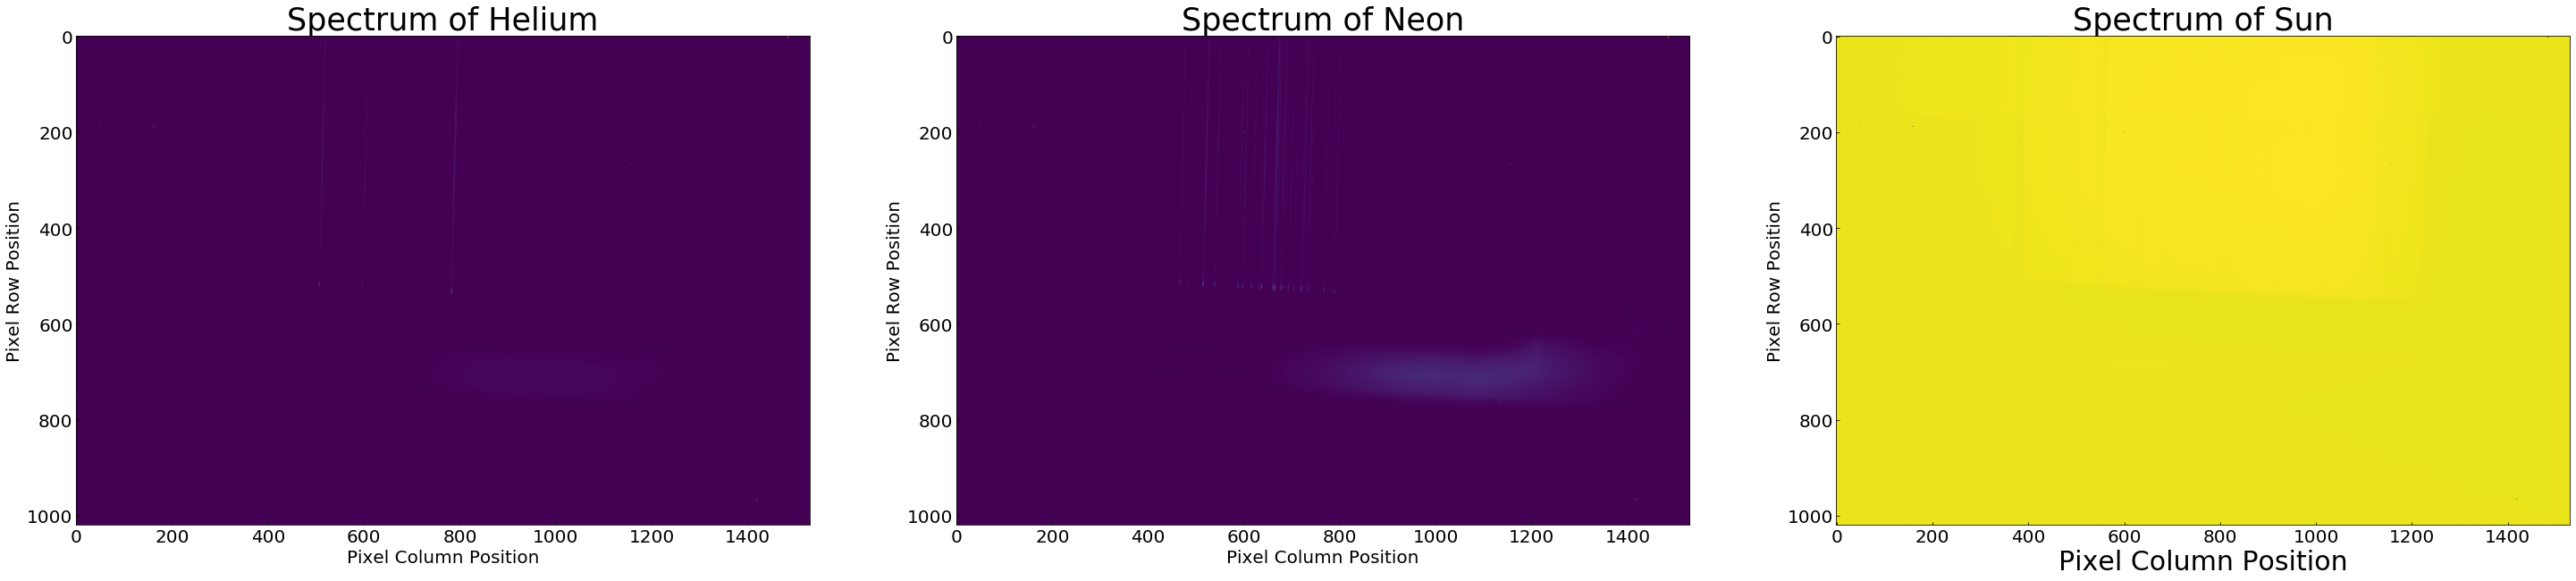

In [35]:
fig = plt.figure(figsize=(50,100),frameon=False) #setting the graph dimensions 

ax1 = plt.subplot(1,3,1) #the spectrum of helium plot
ax1.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax1.imshow(avg_He)
ax1.set_xlabel('Pixel Column Position',fontsize=20)
ax1.set_ylabel('Pixel Row Position',fontsize=20)
ax1.set_title('Spectrum of Helium',fontsize=35)

ax2 = plt.subplot(1,3,2) #the spectrum of neon plot
ax2.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax2.imshow(avg_Ne) 
ax2.set_xlabel('Pixel Column Position',fontsize=20)
ax2.set_ylabel('Pixel Row Position',fontsize=20)
ax2.set_title('Spectrum of Neon',fontsize=35)

ax3 = plt.subplot(1,3,3) #the spectrum of the Sun plot
ax3.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax3.imshow(avg_Solar) 
ax3.set_xlabel('Pixel Column Position',fontsize=30)
ax3.set_ylabel('Pixel Row Position',fontsize=20)
ax3.set_title('Spectrum of Sun',fontsize=35)

Text(0.5, 1.0, 'Spectrum of Helium')

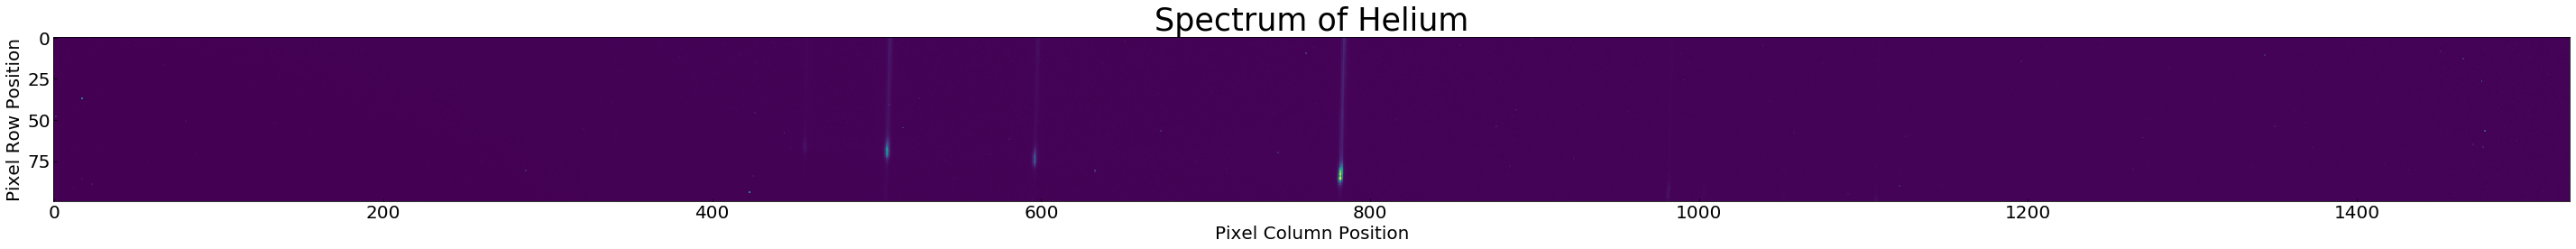

In [36]:
fig = plt.figure(figsize=(50,100),frameon=False) #selecting rows within data that contain spectrum

ax1 = plt.subplot(1,1,1)
ax1.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax1.imshow(avg_He[450:550,:])
ax1.set_xlabel('Pixel Column Position',fontsize=20)
ax1.set_ylabel('Pixel Row Position',fontsize=20)
ax1.set_title('Spectrum of Helium',fontsize=35)

Text(0.5, 1.0, 'Spectrum of Neon')

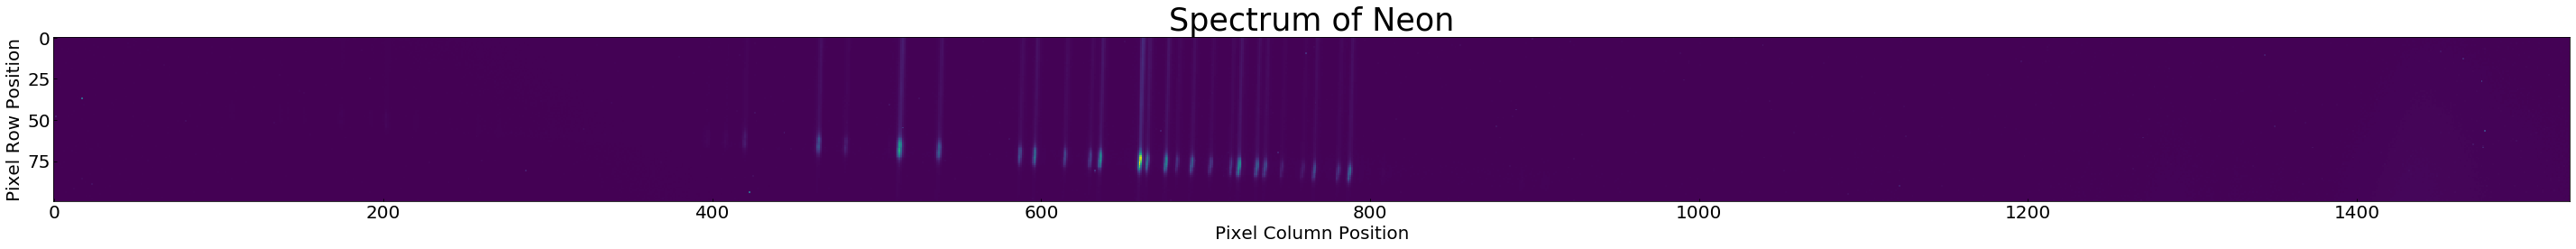

In [37]:
fig = plt.figure(figsize=(50,100),frameon=False) #selecting rows within data that contain spectrum

ax2 = plt.subplot(1,1,1)
ax2.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax2.imshow(avg_Ne[450:550,:])
ax2.set_xlabel('Pixel Column Position',fontsize=20)
ax2.set_ylabel('Pixel Row Position',fontsize=20)
ax2.set_title('Spectrum of Neon',fontsize=35)

Text(0.5, 1.0, 'Spectrum of Sun')

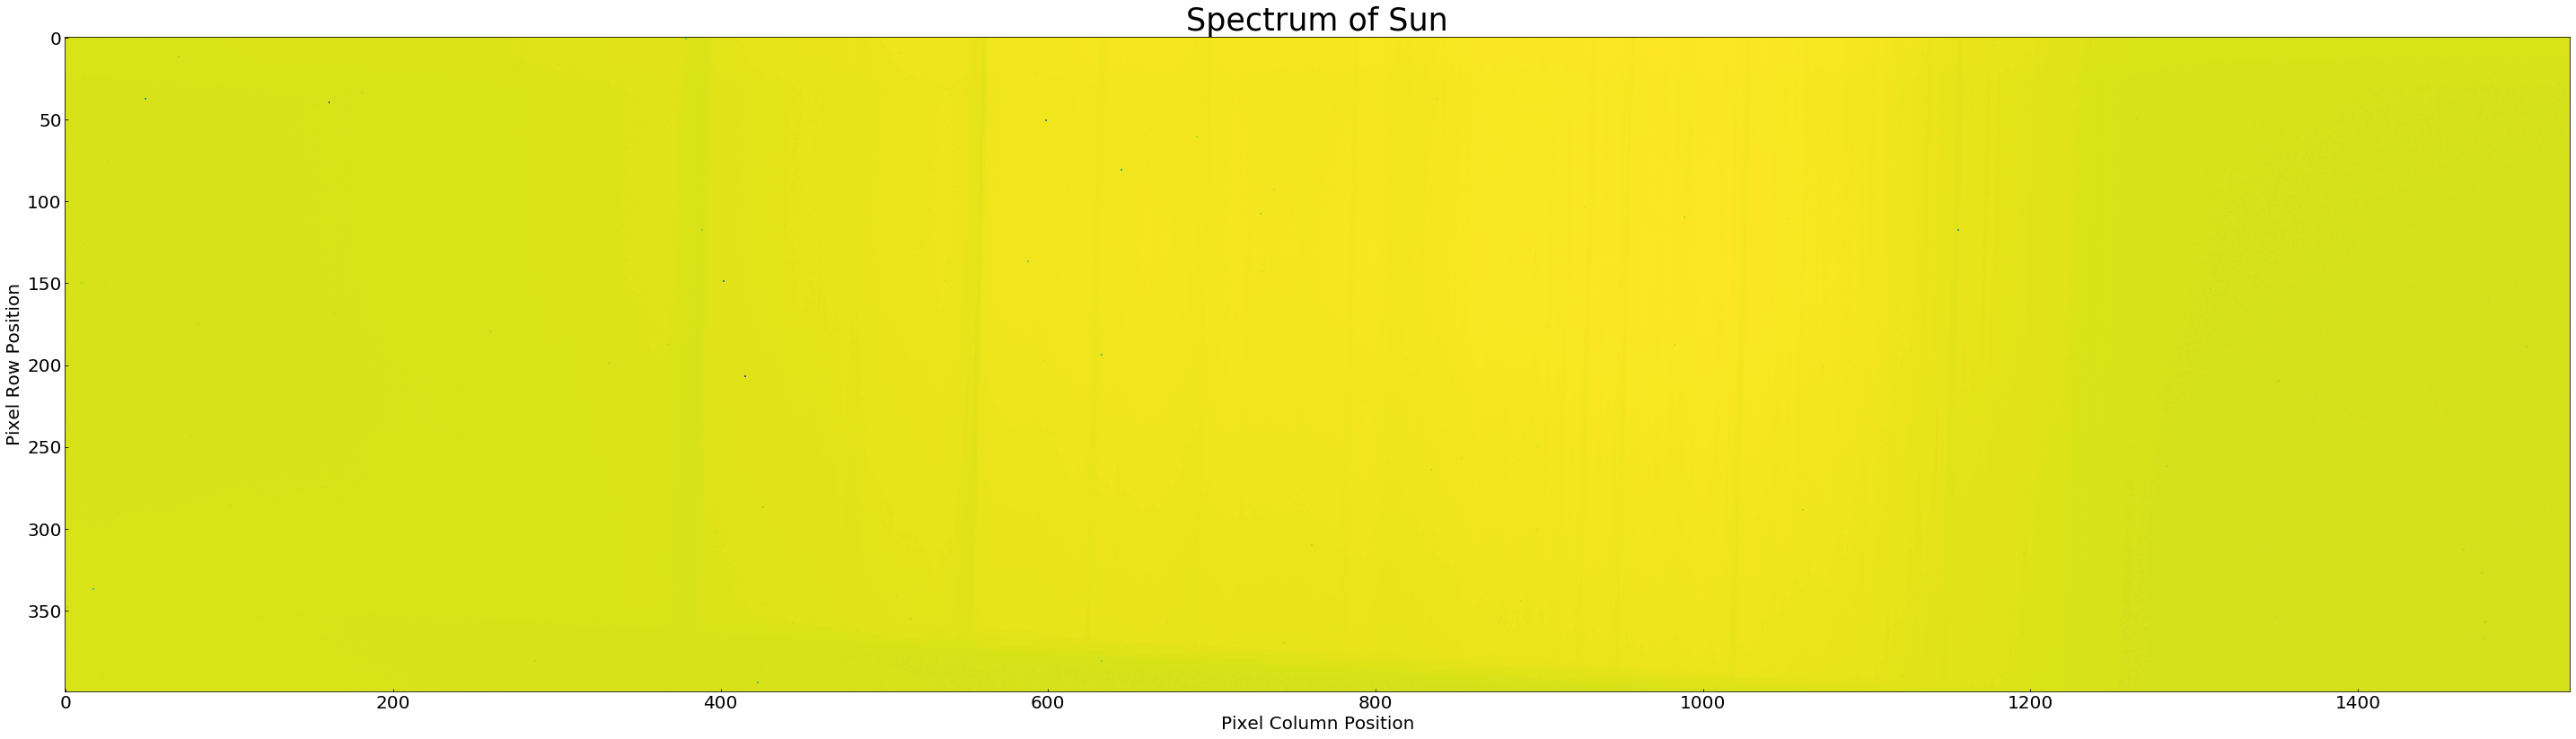

In [38]:
fig = plt.figure(figsize=(50,100),frameon=False) #selecting rows within data that contain spectrum

ax3 = plt.subplot(1,1,1)
ax3.tick_params(axis='both',which='both',direction='in',labelsize=20)
ax3.imshow(avg_Solar[150:550,:])
ax3.set_xlabel('Pixel Column Position',fontsize=20)
ax3.set_ylabel('Pixel Row Position',fontsize=20)
ax3.set_title('Spectrum of Sun',fontsize=35)

In [39]:
He_good = np.asarray(avg_He[450:550,:]).mean(axis=0) #averaging across the rows of interest for all 1530 columns of pixels
Ne_good = np.asarray(avg_Ne[450:550,:]).mean(axis=0)
Sun_good = np.asarray(avg_Solar[150:550,:]).mean(axis=0)

log_He_good = np.log(He_good) #taking the log of the photon counts/y-axes
log_Ne_good = np.log(Ne_good)
log_Sun_good = np.log(Sun_good)

/Users/messeremichael/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [40]:
He_txt = open("/Users/messeremichael/Downloads/Astro361_Lab6_Data/Helium_Data.txt", "r") #vieiwng known spectral data and features
He_spectrum = He_txt.read()
#print(He_spectrum)

In [41]:
Ne_txt = open("/Users/messeremichael/Downloads/Astro361_Lab6_Data/Neon_Data.txt", "r") #vieiwng known spectral data and features
Ne_spectrum = Ne_txt.read()
#print(Ne_spectrum)

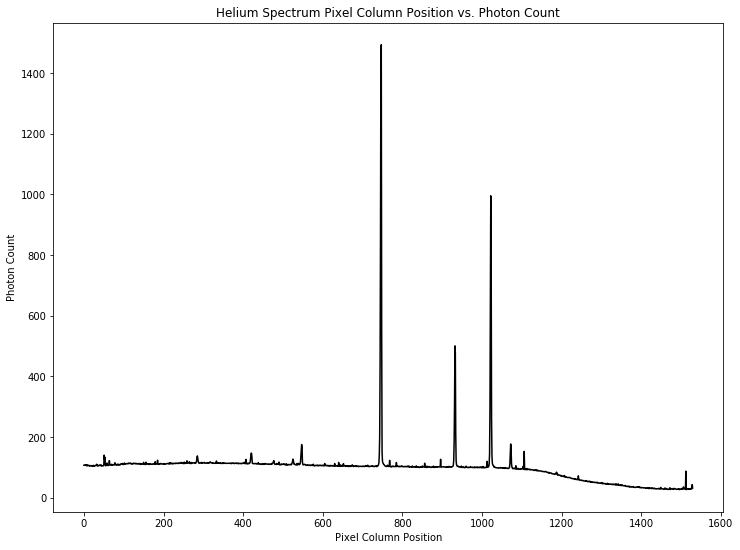

In [42]:
plt.plot(x, He_good, 'k-') #plotting Helium spectrum with pixel counts
x = np.flip(np.arange(len(He_good)),0)
plt.title("Helium Spectrum Pixel Column Position vs. Photon Count")
plt.xlabel('Pixel Column Position')
plt.ylabel('Photon Count')

plt.show()

In [43]:
pixel_pos = [] #creating an empty array to determine the pixel positions of the three Helium peaks 
photo_count = []

for i in range(len(He_good)):
    if He_good[i] > 400: #only the three peaks in the spectrum are greater than 400 pixel counts
        pixel_pos.append(i)
        photo_count.append(He_good[i])
        

print(pixel_pos) 
print(photo_count)

[506, 507, 508, 596, 597, 781, 782, 783, 784, 785]
[795.16, 995.6133333333336, 609.5833333333333, 480.0666666666665, 500.88000000000005, 544.1166666666668, 1493.5033333333338, 1450.733333333333, 848.6333333333334, 437.0133333333332]


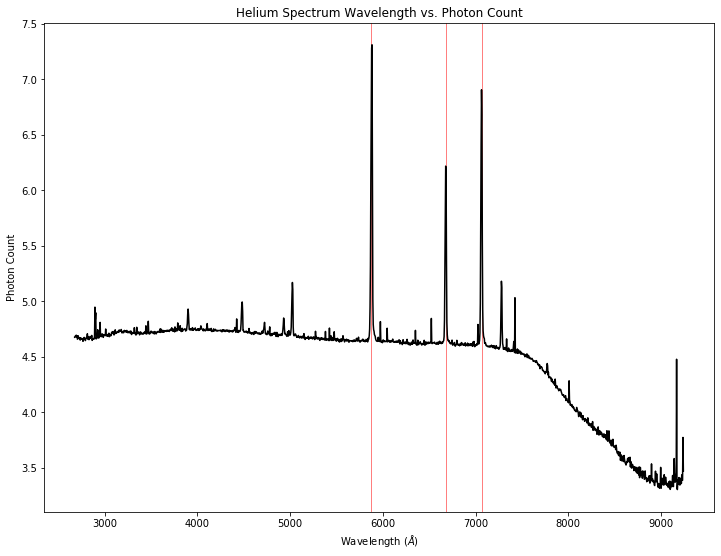

In [44]:
#He_lines = [3964.73,4009.27,4026.19,4026.36,4120.82,4120.99,4143.76,4387.93,4437.55,4471.48,4471.68,4685.40,4685.70,4713.15,4713.38,4921.93,5015.68,5047.74,5411.52,5875.62,5875.97,6560.10,6678.15,6867.48,7065.19,7065.71]
He_lines = [5875.97,6678.15,7065.19] #list of known angstrom values for the three peaks           
photon_counts = [500,200,100]    

for line in He_lines:
    plt.axvline(line,color='r', lw = .5)
    
    
x = np.flip(np.arange(len(He_good)),0)

x = x*4.29505 + 2675

plt.plot(x, log_He_good, 'k-')

plt.title("Helium Spectrum Wavelength vs. Photon Count")
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photon Count')

plt.show()

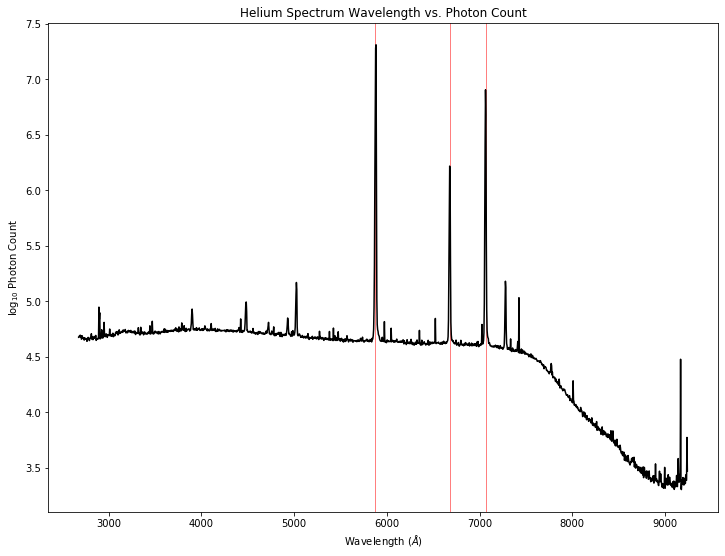

In [45]:
#He_lines = [3964.73,4009.27,4026.19,4026.36,4120.82,4120.99,4143.76,4387.93,4437.55,4471.48,4471.68,4685.40,4685.70,4713.15,4713.38,4921.93,5015.68,5047.74,5411.52,5875.62,5875.97,6560.10,6678.15,6867.48,7065.19,7065.71]
He_lines = [5875.97,6678.15,7065.19]            
photon_counts = [500,200,100]    

for line in He_lines:
    plt.axvline(line,color='r', lw = .5)
    
x = np.flip(np.arange(len(He_good)),0)

x = x*4.29505 + 2675

plt.plot(x, log_He_good, 'k-')

plt.title("Helium Spectrum Wavelength vs. Photon Count")
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('$\log_{10}$ Photon Count')

plt.show()

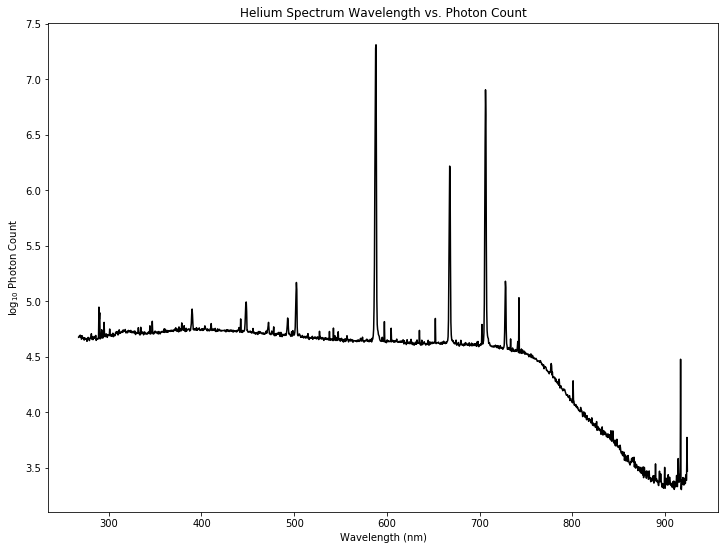

In [46]:
x = np.flip(np.arange(len(He_good)),0)

x = x*4.29505 + 2675

x_nm = x * 10**-1 #Same Helium plot but with conversion to nanometers 

plt.plot(x_nm, log_He_good, 'k-')

plt.title("Helium Spectrum Wavelength vs. Photon Count")
plt.xlabel('Wavelength (nm)')
plt.ylabel('$\log_{10}$ Photon Count')

plt.show()

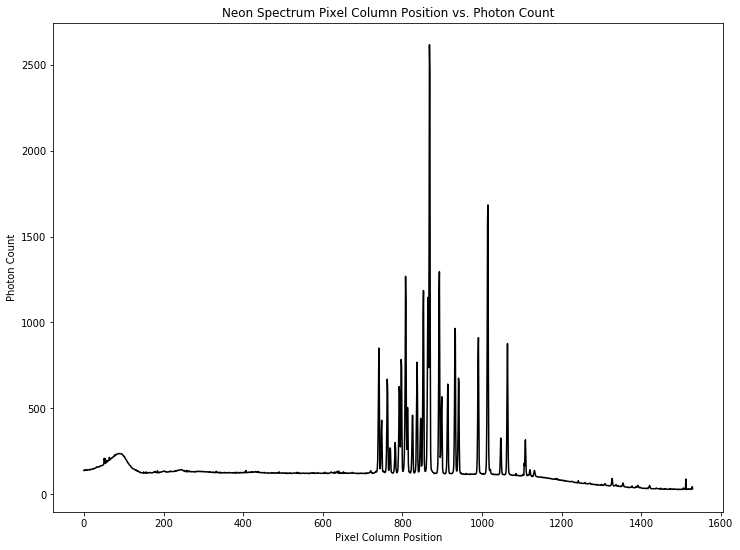

In [47]:
plt.plot(np.flip(np.arange(len(Ne_good))), Ne_good, 'k-') #plotting the neon data 

plt.title("Neon Spectrum Pixel Column Position vs. Photon Count")
plt.xlabel('Pixel Column Position')
plt.ylabel('Photon Count')

plt.show()

In [48]:
pixel_pos = [] #finding two peaks in the Neon data for calibration, but Helium was used instead
photo_count = []

for i in range(len(Ne_good)):
    if Ne_good[i] > 1500:
        pixel_pos.append(i)
        photo_count.append(Ne_good[i])
        

print(pixel_pos) 
print(photo_count)

[514, 515, 660, 661]
[1683.6766666666672, 1602.0200000000007, 2449.996666666667, 2614.72]


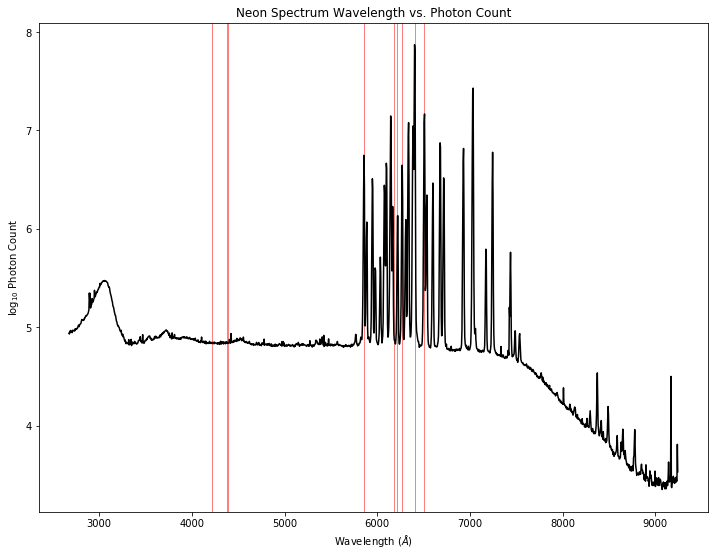

In [49]:
#Using the Helium calibration on the Neon data to make sure it is accurate 

Ne_lines = [4219.74,4379.55,4391.99,5852.49,6182.15,6217.28,6266.50,6402.25,6506.53]
photon_counts = [150,150,200,500,250,150,150,200,150]
#Ne_lines = [5852.49,6182.15]
#photon_counts = [500,250]

for line in Ne_lines:
       plt.axvline(line,color='r', lw = .5)   

x = np.flip(np.arange(len(Ne_good)),0)

x = x*4.29505 + 2675

plt.plot(x, log_Ne_good, 'k-')

plt.title("Neon Spectrum Wavelength vs. Photon Count")
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('$\log_{10}$ Photon Count')

plt.show()

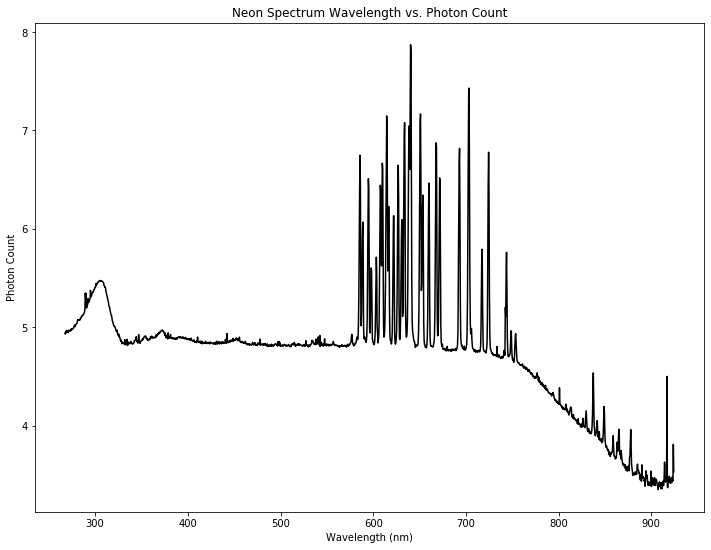

In [50]:
x = np.flip(np.arange(len(Ne_good)),0)

x = x*4.29505 + 2675

x_nm = x * 10**-1 #Neon data in nanometers 

plt.plot(x_nm, log_Ne_good, 'k-')

plt.title("Neon Spectrum Wavelength vs. Photon Count")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Photon Count')

plt.show()

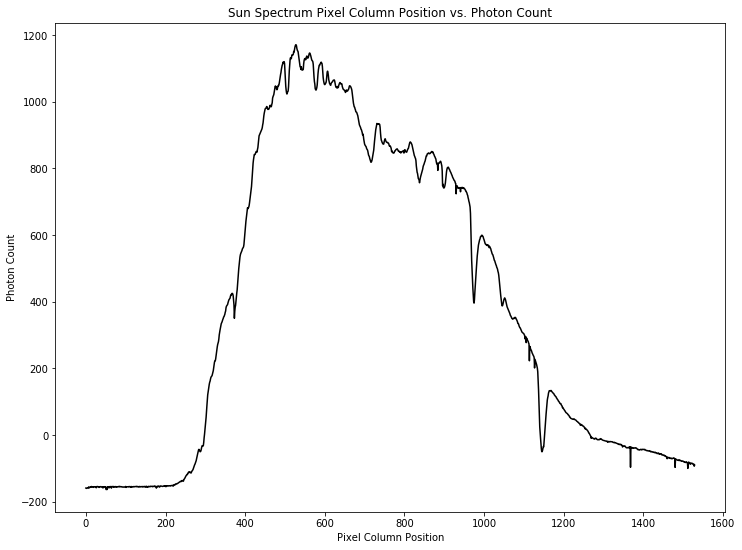

In [51]:
plt.plot(np.flip(np.arange(len(Sun_good)),0), Sun_good, 'k-') #plotting the solar spectrum in pixel dimensions 

plt.title("Sun Spectrum Pixel Column Position vs. Photon Count")
plt.xlabel('Pixel Column Position')
plt.ylabel('Photon Count')

plt.show()

In [52]:
x = np.flip(np.arange(len(Sun_good)),0) #plotting solar spectrum in angstroms 

x = x*4.29505 + 2675

plt.plot(x,Sun_good, 'k-')

plt.title("Sun Spectrum Wavelength vs. Photon Count")
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Photon Count')

plt.show()

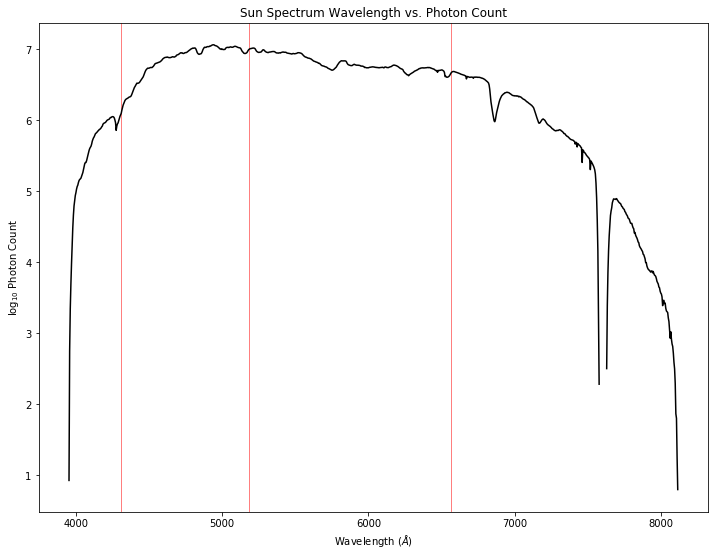

In [53]:
#scaling the Solar spectrum with log y-axis and including three known Fraunhofer lines within the spectrum

Solar_lines = [4307.74,5183.62,6562.81]
photon_counts = [150,150,200,500,250,150,150,200,150]
#Ne_lines = [5852.49,6182.15]
#photon_counts = [500,250]

for line in Solar_lines:
       plt.axvline(line,color='r', lw = .5)   

x = np.flip(np.arange(len(Sun_good)),0)

x = x*4.29505 + 2675

x_nm = x * 10**-1

plt.plot(x, log_Sun_good, 'k-')

plt.title("Sun Spectrum Wavelength vs. Photon Count")
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('$\log_{10}$ Photon Count')

plt.show()

Text(0, 0.5, '$\\log_{10}$ Photon Count')

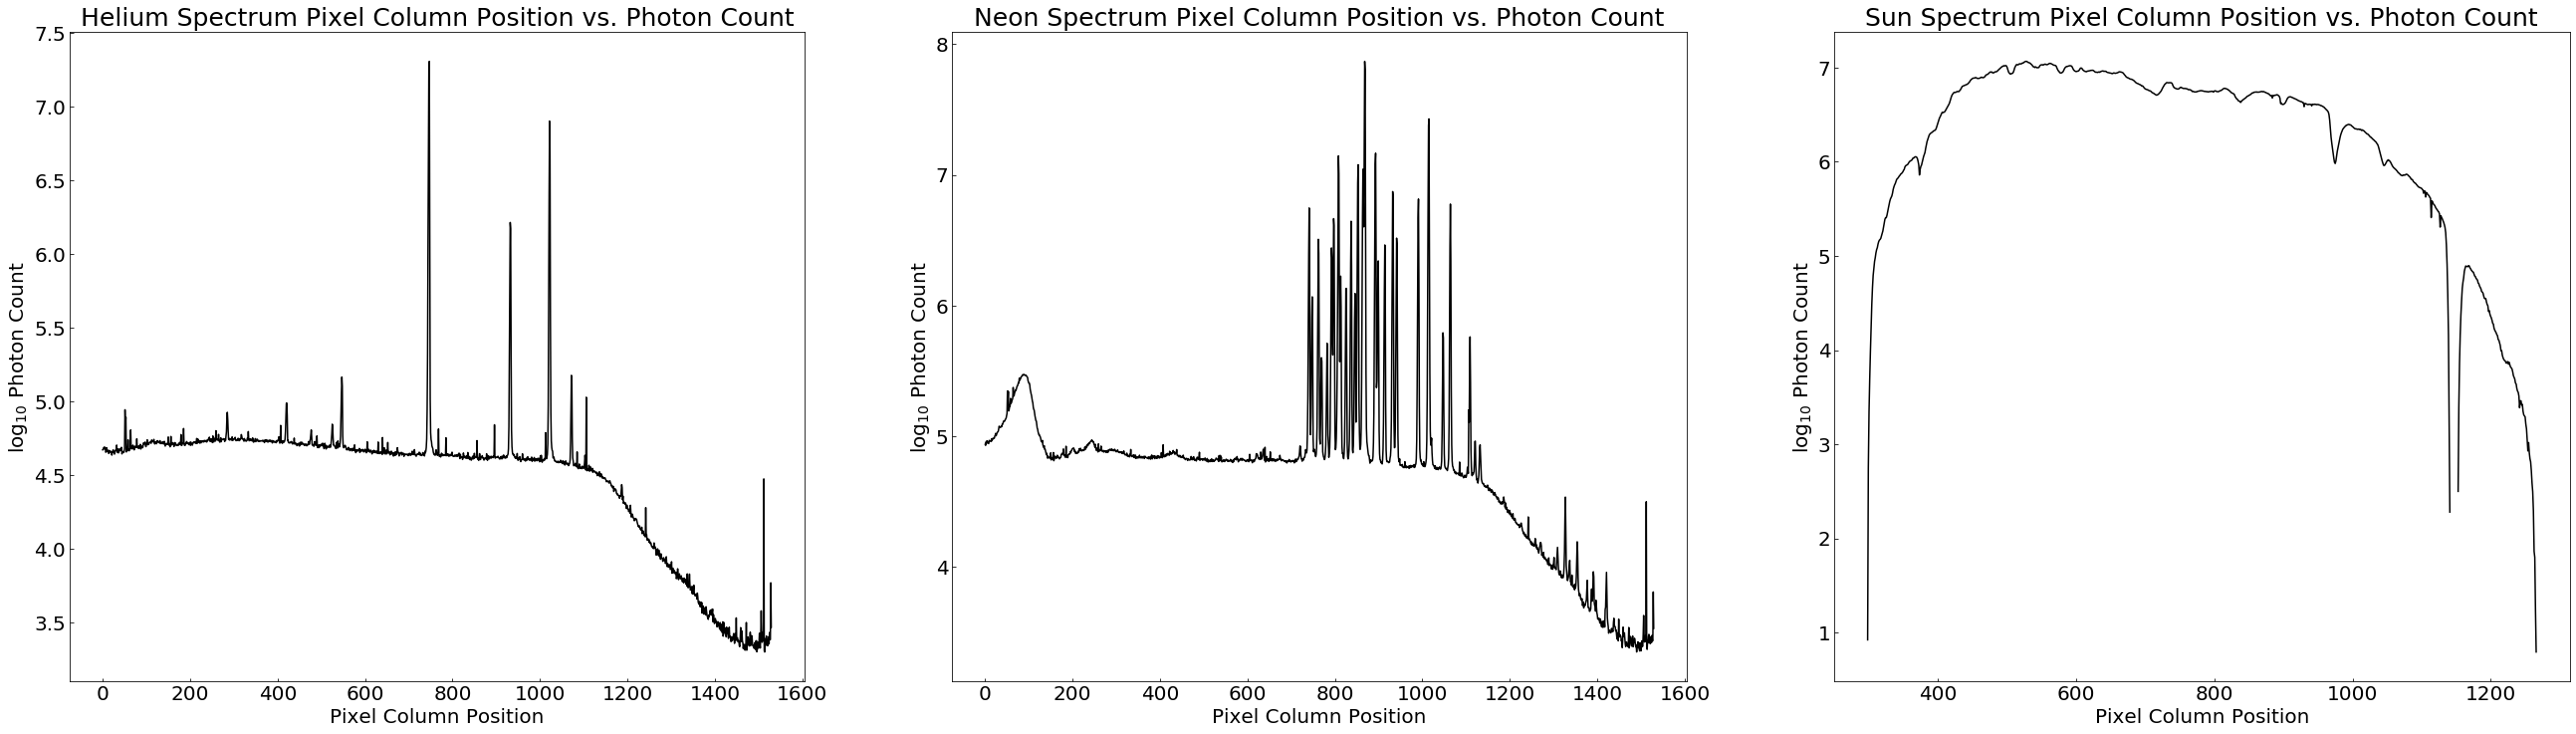

In [54]:
#below is a repeat of the pixel dimension graphs above, but allowed me to condense them for the lab report 

fig = plt.figure(figsize=(45,12),frameon=False)

ax1 = plt.subplot(1,3,1)
ax1.tick_params(axis='both',which='both',direction='in',labelsize=20)
#ax1.imshow(avg_He)
#ax1.set_xlabel('Pixel Column Position',fontsize=20)
#ax1.set_ylabel('Pixel Row Position',fontsize=20)
#ax1.set_title('Spectrum of Helium',fontsize=35)

x = np.flip(np.arange(len(He_good)),0)
plt.plot(x, log_He_good, 'k-')

ax1.set_title("Helium Spectrum Pixel Column Position vs. Photon Count",fontsize=25)
ax1.set_xlabel('Pixel Column Position',fontsize=20)
ax1.set_ylabel('$\log_{10}$ Photon Count',fontsize=20)

#plt.show()







ax2 = plt.subplot(1,3,2)
ax2.tick_params(axis='both',which='both',direction='in',labelsize=20)
#ax2.imshow(avg_Ne) 
#ax2.set_xlabel('Pixel Column Position',fontsize=20)
#ax2.set_ylabel('Pixel Row Position',fontsize=20)
#ax2.set_title('Spectrum of Neon',fontsize=35)

x = np.flip(np.arange(len(Ne_good)),0)

ax2.plot(x, log_Ne_good, 'k-')

ax2.set_title("Neon Spectrum Pixel Column Position vs. Photon Count",fontsize=25)
ax2.set_xlabel('Pixel Column Position',fontsize=20)
ax2.set_ylabel('$\log_{10}$ Photon Count',fontsize=20)

#plt.show()




ax3 = plt.subplot(1,3,3)
ax3.tick_params(axis='both',which='both',direction='in',labelsize=20)
#ax3.imshow(avg_Solar) 
#ax3.set_xlabel('Pixel Column Position',fontsize=30)
#ax3.set_ylabel('Pixel Row Position',fontsize=20)
#ax3.set_title('Spectrum of Sun',fontsize=35)



ax3.plot(np.flip(np.arange(len(Sun_good)),0), log_Sun_good, 'k-')

ax3.set_title("Sun Spectrum Pixel Column Position vs. Photon Count",fontsize=25)
ax3.set_xlabel('Pixel Column Position',fontsize=20)
ax3.set_ylabel('$\log_{10}$ Photon Count',fontsize=20)

#plt.show()